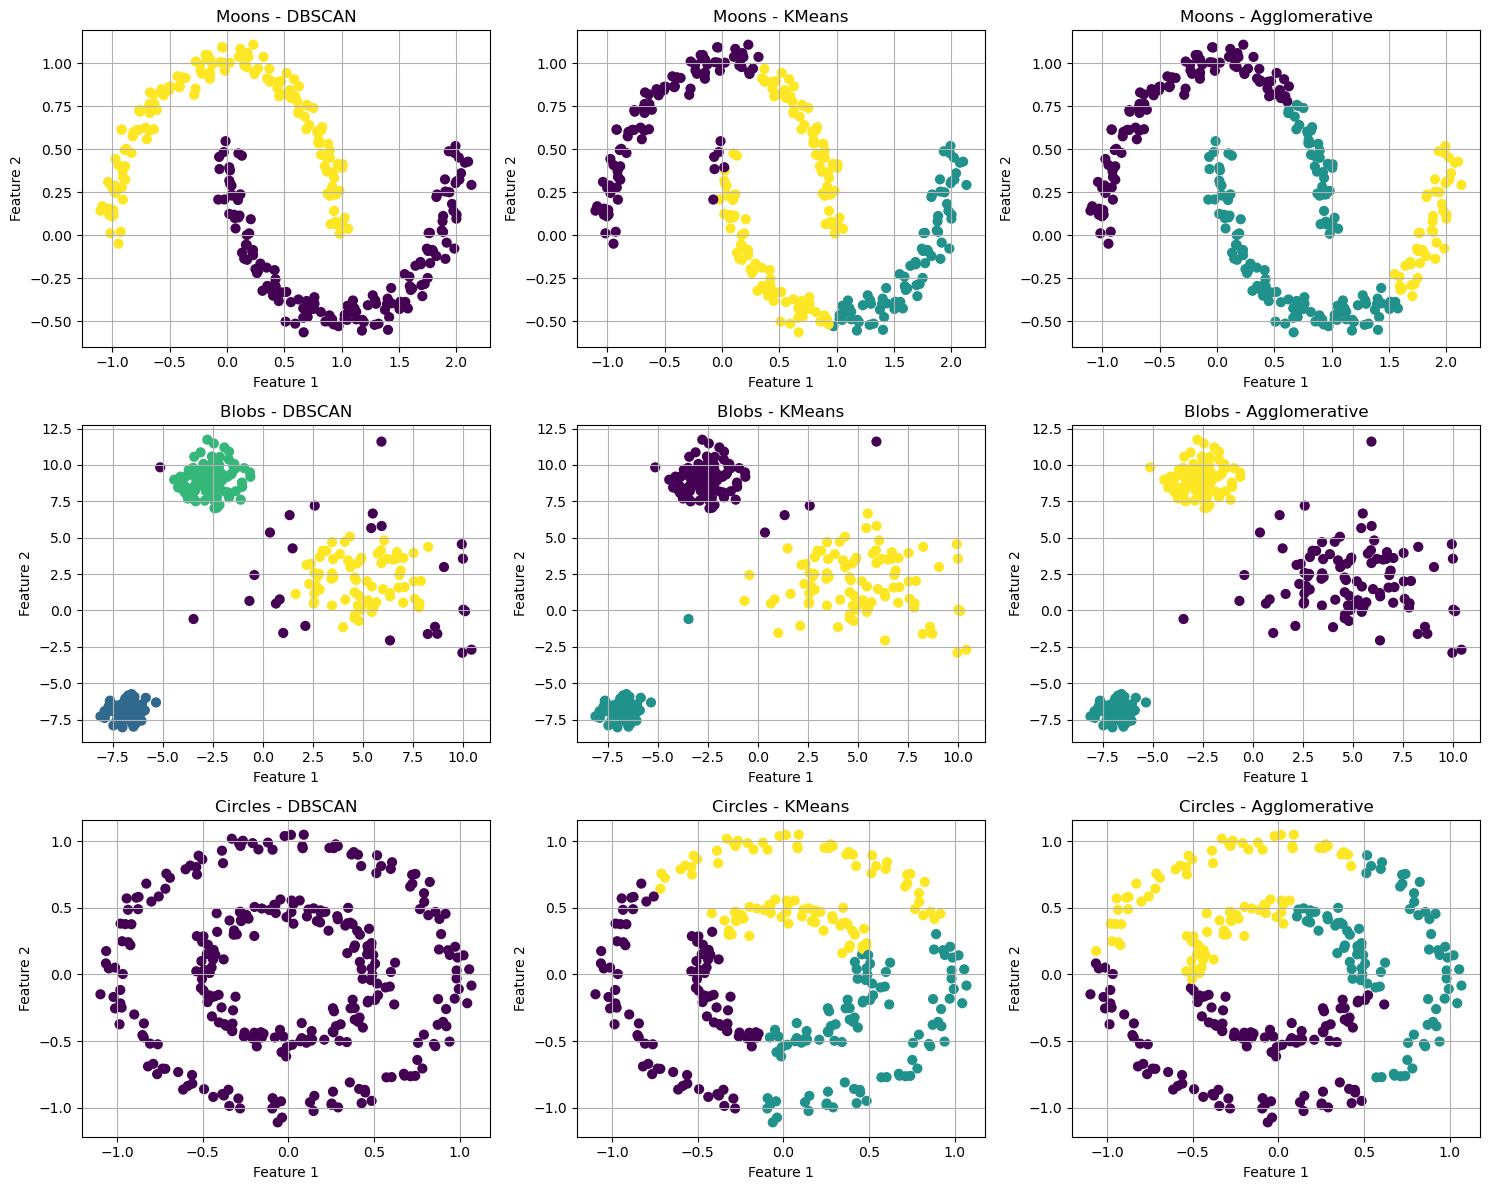

In [7]:
# Import DBSCAN to fix the NameError
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons, make_blobs, make_circles
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs, make_circles
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering


# Re-run the plotting code to regenerate the plot with corrected import

# Generate datasets again
X_moons, _ = make_moons(n_samples=300, noise=0.05, random_state=42)
X_blobs, _ = make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=42)
X_circles, _ = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)


def apply_clustering(X, method, **kwargs):
    if method == "DBSCAN":
        return DBSCAN(**kwargs).fit_predict(X)
    elif method == "KMeans":
        return KMeans(n_clusters=3, random_state=42).fit_predict(X)
    elif method == "Agglomerative":
        return AgglomerativeClustering(n_clusters=3).fit_predict(X)


# Re-define clustering results
results = {
    "Moons": {
        "DBSCAN": apply_clustering(X_moons, "DBSCAN", eps=0.3, min_samples=5),
        "KMeans": apply_clustering(X_moons, "KMeans"),
        "Agglomerative": apply_clustering(X_moons, "Agglomerative")
    },
    "Blobs": {
        "DBSCAN": apply_clustering(X_blobs, "DBSCAN", eps=1.0, min_samples=5),
        "KMeans": apply_clustering(X_blobs, "KMeans"),
        "Agglomerative": apply_clustering(X_blobs, "Agglomerative")
    },
    "Circles": {
        "DBSCAN": apply_clustering(X_circles, "DBSCAN", eps=0.3, min_samples=5),
        "KMeans": apply_clustering(X_circles, "KMeans"),
        "Agglomerative": apply_clustering(X_circles, "Agglomerative")
    }
}

# Plot again
fig, axs = plt.subplots(3, 3, figsize=(15, 12))
datasets = [X_moons, X_blobs, X_circles]
titles = ["DBSCAN", "KMeans", "Agglomerative"]
dataset_names = ["Moons", "Blobs", "Circles"]

for row, (X, dname) in enumerate(zip(datasets, dataset_names)):
    for col, method in enumerate(titles):
        axs[row, col].scatter(X[:, 0], X[:, 1], c=results[dname][method], cmap='viridis', s=40)
        axs[row, col].set_title(f"{dname} - {method}")
        axs[row, col].set_xlabel("Feature 1")
        axs[row, col].set_ylabel("Feature 2")
        axs[row, col].grid(True)

plt.tight_layout()
